## Observations and Insights 

In [1]:
# # Observation 1

# Ramicane and Capomulin seem to be the most effective drug regimens to reduce the tumor volume in mice.

In [2]:
# Observation 2

# The correlation and regresion model plot shows that the tumor volume has a strong positive correlation
# with the mouse weight.

In [3]:
# Observation 3

# Capomulin treatments shows a steady drecrease in the tumor volume in mouse "m601", as shown in the line plot
# this treatment shrink the tumor volume reducing 35% of its size.

In [4]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [5]:
# Study data files

mouse_metadata_path = "Pymaceuticals - data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals - data/Study_results.csv"

In [6]:
# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [7]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [8]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [9]:
# Combine the data into a single dataset

combined_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'left')
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking data frame 

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [11]:
combined_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [12]:
# Checking the number of mice in the DataFrame.

number_mice = combined_df['Mouse ID'].nunique()
print (f"The Number of mice in the study is {number_mice}")

The Number of mice in the study is 249


In [13]:
combined_df['Mouse ID']

0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object

In [14]:
combined_df['Timepoint']

0        0
1        5
2       10
3       15
4       20
        ..
1888    25
1889    30
1890    35
1891    40
1892    45
Name: Timepoint, Length: 1893, dtype: int64

In [15]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combined_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [16]:
combined_df[combined_df.duplicated()].head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [17]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_duplicated_df = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'], keep= False)]
combined_duplicated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_combined_df = combined_df.loc[combined_df['Mouse ID']!='g989']
clean_combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Checking the number of mice in the clean DataFrame.

clean_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [20]:
clean_combined_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [21]:
clean_combined_df['Mouse ID'].nunique()

248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

drug_regimen = clean_combined_df['Drug Regimen'].unique()
drug_regimen

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [23]:
mean = clean_combined_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [24]:
median = clean_combined_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [25]:
variance = clean_combined_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [26]:
sd = clean_combined_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sd

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [27]:
SEM = clean_combined_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
SEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [28]:
summary_statistics_df = pd.DataFrame({
    
    
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Standard Deviation': sd,
    'SEM': SEM
})
summary_statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

summary_statistics_single_df = clean_combined_df.groupby(['Drug Regimen'])
summary_statistics_single_df['Tumor Volume (mm3)'].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar Plots

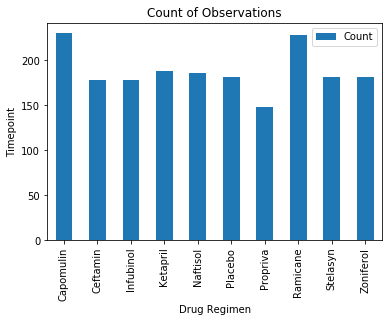

In [30]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

pandas_plot_df = pd.DataFrame(clean_combined_df.groupby(["Drug Regimen"]).count()).reset_index()
regimen= pandas_plot_df[["Drug Regimen","Mouse ID"]]
regimen=regimen.rename(columns={"Mouse ID": "Count"})
regimen=regimen.set_index("Drug Regimen")
regimen.plot(kind="bar")
plt.title("Count of Observations")
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoint')
plt.show()

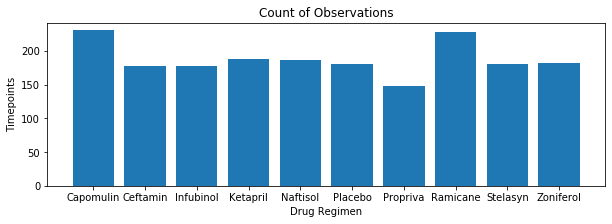

In [31]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

pyplot = clean_combined_df.groupby(["Drug Regimen"])["Mouse ID"].count()
pyplot        
y_axis = np.arange(len(pyplot))
regimen1 = summary_statistics_df.index.tolist()  
plt.figure(figsize=(10,3))
plt.bar(regimen1, pyplot)
plt.title("Count of Observations")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.show()

## Pie Plots

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df=pd.DataFrame(clean_combined_df.groupby(["Sex"],).count()).reset_index()
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df

,Sex,Count
0,Female,922
1,Male,958


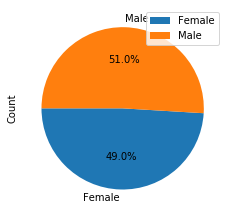

In [33]:
plt.figure(figsize=(8,5))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
startangle=180, labels=gender_df['Sex'])

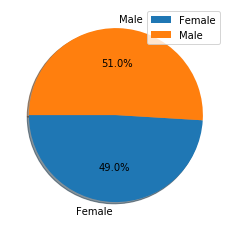

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
plt.pie(gender_df["Count"], labels=labels, autopct="%1.1f%%", shadow=True, startangle=180)
plt.legend(labels,loc="best")
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
 
promising_treatments_df = clean_combined_df.loc[(clean_combined_df['Drug Regimen'] == 'Ramicane') |
                                             (clean_combined_df['Drug Regimen'] =='Capomulin') | 
                                             (clean_combined_df['Drug Regimen'] =='Ceftamin') |
                                             (clean_combined_df['Drug Regimen'] =='Infubinol'),:]
promising_treatments_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [36]:
tumor_volume = promising_treatments_df.groupby(['Drug Regimen','Timepoint'])
timepoint_mean = tumor_volume['Tumor Volume (mm3)'].mean()

timepoint_mean = pd.DataFrame(timepoint_mean)
timepoint_mean = timepoint_mean.reset_index()
final_volume = timepoint_mean.loc[(timepoint_mean['Timepoint']== 45),:]
final_volume

,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,Capomulin,45,36.236114
19,Ceftamin,45,64.132421
29,Infubinol,45,65.755562
39,Ramicane,45,34.955595


In [37]:
treatment_pot_outliers = promising_treatments_df.loc[(promising_treatments_df['Timepoint'] >= 45)]

capomulin_df = treatment_pot_outliers.loc[(treatment_pot_outliers['Drug Regimen']== 'Capomulin')]
ceftamin_df = treatment_pot_outliers.loc[(treatment_pot_outliers['Drug Regimen']== 'Ceftamin')]
infubinol_df =treatment_pot_outliers.loc[(treatment_pot_outliers['Drug Regimen']== 'Infubinol')]
ramicane_df = treatment_pot_outliers.loc[(treatment_pot_outliers['Drug Regimen']== 'Ramicane')]
treatment_pot_outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [38]:
#Capomulin Quartile Calculation

capomulin_quartiles = capomulin_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
capomulin_lower_quartiles = capomulin_quartiles[0.25]
capomulin_upper_quartiles = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upper_quartiles-capomulin_lower_quartiles
capomulin_lower_bound = capomulin_lower_quartiles - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upper_quartiles + (1.5*capomulin_iqr)

print(f"Capomulin lower quartile: {capomulin_lower_quartiles}")
print(f"Capomulin upper quartile: {capomulin_upper_quartiles}")
print(f"Capomulin interquartile : {capomulin_iqr}")
print(f"Capomulin values below {capomulin_lower_bound} could be outliers.")

Capomulin lower quartile: 32.37735684
Capomulin upper quartile: 40.1592203
Capomulin interquartile : 7.781863460000004
Capomulin values below 20.70456164999999 could be outliers.


In [39]:
#Ramicane Quartile Calculation

ramicane_quartiles = ramicane_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
ramicane_lower_quartiles = ramicane_quartiles[0.25]
ramicane_upper_quartiles = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upper_quartiles-ramicane_lower_quartiles
ramicane_lower_bound = ramicane_lower_quartiles - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upper_quartiles + (1.5*ramicane_iqr)

print(f"Ramicane lower quartile: {ramicane_lower_quartiles}")
print(f"Ramicane upper quartile: {ramicane_upper_quartiles}")
print(f"Ramicane interquartile : {ramicane_iqr}")
print(f"Ramicane values below {ramicane_lower_bound} could be outliers.")
print(f"Ramicane values above {ramicane_upper_bound} could be outliers.")

Ramicane lower quartile: 30.981175224999998
Ramicane upper quartile: 38.508305307499995
Ramicane interquartile : 7.527130082499998
Ramicane values below 19.690480101250003 could be outliers.
Ramicane values above 49.79900043124999 could be outliers.


In [40]:
#Infubinol Quartile Calculation

infubinol_quartiles = infubinol_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
infubinol_lower_quartiles = infubinol_quartiles[0.25]
infubinol_upper_quartiles = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upper_quartiles-capomulin_lower_quartiles
infubinol_lower_bound = infubinol_lower_quartiles - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upper_quartiles + (1.5*infubinol_iqr)

print(f"Infubinol lower quartile: {infubinol_lower_quartiles}")
print(f"Infubinol upper quartile: {infubinol_upper_quartiles}")
print(f"Infubinol interquartile : {infubinol_iqr}")
print(f"Infubinol values below {infubinol_lower_bound} could be outliers.")
print(f"Infubinol values above {infubinol_upper_bound} could be outliers.")

Infubinol lower quartile: 62.75445141
Infubinol upper quartile: 67.68556862
Infubinol interquartile : 35.30821178
Infubinol values below 9.792133739999997 could be outliers.
Infubinol values above 120.64788629 could be outliers.


In [41]:
#Ceftamin Quartile Calculation

ceftamin_quartiles = ceftamin_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
ceftamin_lower_quartiles = ceftamin_quartiles[0.25]
ceftamin_upper_quartiles = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upper_quartiles-ceftamin_lower_quartiles
ceftamin_lower_bound = ceftamin_lower_quartiles - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upper_quartiles + (1.5*ceftamin_iqr)

print(f"Ceftamin lower quartile: {ceftamin_lower_quartiles}")
print(f"Ceftamin upper quartile: {ceftamin_upper_quartiles}")
print(f"Ceftamin interquartile : {ceftamin_iqr}")
print(f"Ceftamin values below {ceftamin_lower_bound} could be outliers.")
print(f"Ceftamin values above {ceftamin_upper_bound} could be outliers.")

Ceftamin lower quartile: 61.43389223
Ceftamin upper quartile: 67.52748237
Ceftamin interquartile : 6.093590140000003
Ceftamin values below 52.29350701999999 could be outliers.
Ceftamin values above 76.66786758 could be outliers.


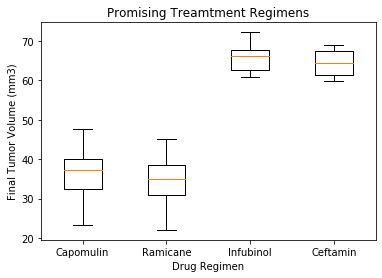

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

final_tumor_volume = [capomulin_df['Tumor Volume (mm3)'],
                      ramicane_df['Tumor Volume (mm3)'],
                      infubinol_df['Tumor Volume (mm3)'],
                      ceftamin_df ['Tumor Volume (mm3)']]

fig1, ax = plt.subplots()
ax.set_title('Promising Treamtment Regimens')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')
ax.boxplot(final_tumor_volume, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])
plt.show()

## Line and Scatter Plots

In [43]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

m601=promising_treatments_df.loc[promising_treatments_df['Mouse ID']=="m601",:]
m601

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,m601,Capomulin,Male,22,17,0,45.000000,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
32,m601,Capomulin,Male,22,17,10,36.825367,1
33,m601,Capomulin,Male,22,17,15,35.464612,1
34,m601,Capomulin,Male,22,17,20,34.255732,1
35,m601,Capomulin,Male,22,17,25,33.118756,1
36,m601,Capomulin,Male,22,17,30,31.758275,1
37,m601,Capomulin,Male,22,17,35,30.834357,1
38,m601,Capomulin,Male,22,17,40,31.378045,1
39,m601,Capomulin,Male,22,17,45,28.430964,1


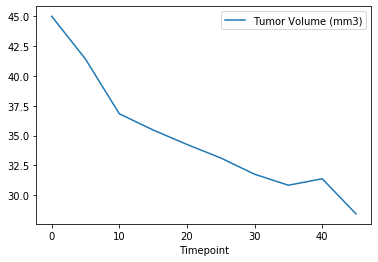

In [44]:
m601.plot.line(x='Timepoint',y='Tumor Volume (mm3)')

In [45]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouse_weight=promising_treatments_df.loc[promising_treatments_df['Drug Regimen']=="Capomulin",:]
mouse_weight

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [46]:
average_volume = pd.DataFrame(mouse_weight.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_volume = average_volume.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_volume.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


Text(0, 0.5, 'Tumor Volume (mm3)')

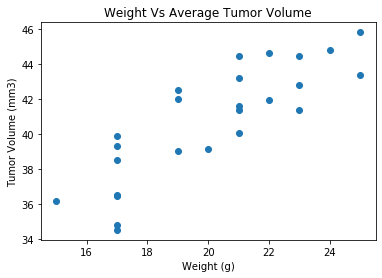

In [47]:
DataScart=mouse_weight.groupby(["Mouse ID"]).mean()
plt.scatter(DataScart['Weight (g)'], DataScart['Tumor Volume (mm3)'])
plt.title('Weight Vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

## Correlation and Regression

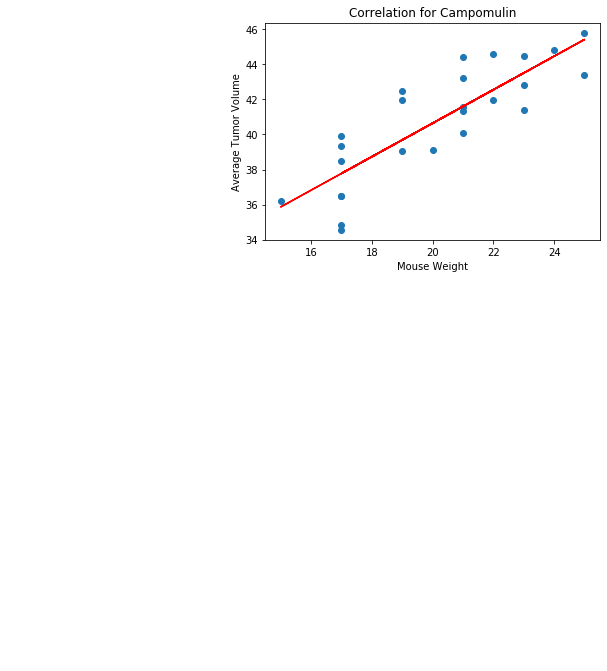

In [48]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = average_volume['Weight (g)']
y_values = average_volume['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title('Correlation for Campomulin')
plt.show()